# Modelling

## Import the required moduels

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2023-03-18 20:36:50.230783: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## 1- Preparing the trainset and testset data

In [2]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data_gen = ImageDataGenerator(rescale=1./255)

training_set = train_data_gen.flow_from_directory(
    'Result/Preprocessing/Adaptive Threshold Mean Rename/Train/',
    target_size=(96, 96),
    batch_size=32,
    class_mode='categorical'
)

testing_set = test_data_gen.flow_from_directory(
    'Result/Preprocessing/Adaptive Threshold Mean Rename/Test/',
    target_size=(96, 96),
    batch_size=32,
    class_mode='categorical'
)

Found 25600 images belonging to 32 classes.
Found 6400 images belonging to 32 classes.


## 2- Building the CNN object

In [3]:
# Initializing the CNN model
classifier = Sequential()

# First convolution layer & Max pooling
classifier.add(Convolution2D(32, (3,  3), input_shape = (96, 96, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Second convolution layer & Max pooling
classifier.add(Convolution2D(32, (3,  3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Third convolution layer
classifier.add(Convolution2D(64, (3,  3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Flattening layers for flatten the data.
classifier.add(Flatten())

# Avoid the 50% of neurons for limit the overfitting of the data on the model.
classifier.add(Dropout(0.5))

# Full connection layers
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(32, activation = 'softmax'))

# Compiling The CNN model
classifier.compile(
    optimizer = optimizers.SGD(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model = classifier.fit_generator(
    training_set,
    # steps_per_epoch=800 ,
    epochs=8,
    validation_data = testing_set,
    # validation_steps = 6400
)

2023-03-18 20:59:47.199261: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-18 20:59:47.281187: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-18 20:59:47.281251: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-18 20:59:47.281303: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alisina): /proc/driver/nvidia/version does not exist
2023-03-18 20:59:47.314895: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlo

Epoch 1/8


2023-03-18 20:59:51.509672: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36192256 exceeds 10% of free system memory.
2023-03-18 20:59:52.328177: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 23040000 exceeds 10% of free system memory.
2023-03-18 20:59:52.331025: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 23040000 exceeds 10% of free system memory.
2023-03-18 20:59:52.760231: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 27993600 exceeds 10% of free system memory.


  1/800 [..............................] - ETA: 50:46 - loss: 3.4205 - accuracy: 0.0625

2023-03-18 20:59:53.103854: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18096128 exceeds 10% of free system memory.


800/800 [==============================] - 600s 746ms/step - loss: 3.3065 - accuracy: 0.0877 - val_loss: 1.3785 - val_accuracy: 0.5947
Epoch 2/8
800/800 [==============================] - 322s 403ms/step - loss: 1.2887 - accuracy: 0.6247 - val_loss: 0.5386 - val_accuracy: 0.8444
Epoch 3/8
800/800 [==============================] - 314s 392ms/step - loss: 0.5952 - accuracy: 0.8233 - val_loss: 0.3064 - val_accuracy: 0.9184
Epoch 4/8
800/800 [==============================] - 322s 403ms/step - loss: 0.3509 - accuracy: 0.8923 - val_loss: 0.1756 - val_accuracy: 0.9555
Epoch 5/8
800/800 [==============================] - 313s 391ms/step - loss: 0.2310 - accuracy: 0.9266 - val_loss: 0.1338 - val_accuracy: 0.9634
Epoch 6/8
800/800 [==============================] - 318s 397ms/step - loss: 0.1683 - accuracy: 0.9453 - val_loss: 0.0948 - val_accuracy: 0.9750
Epoch 7/8
800/800 [==============================] - 324s 405ms/step - loss: 0.1213 - accuracy: 0.9618 - val_loss: 0.0901 - val_accuracy: 0.

## 3- Save the model

In [4]:
with open("AFG_model_02.json", "w") as json_file:
    json_file.write(classifier.to_json())
    json_file.close()

classifier.save_weights("AFG_model_02.h5")

# the second way to save the model
classifier.save('AFGSL_model_02.h5')

In [5]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Summary of Model's History

## 1- Accuracy of model

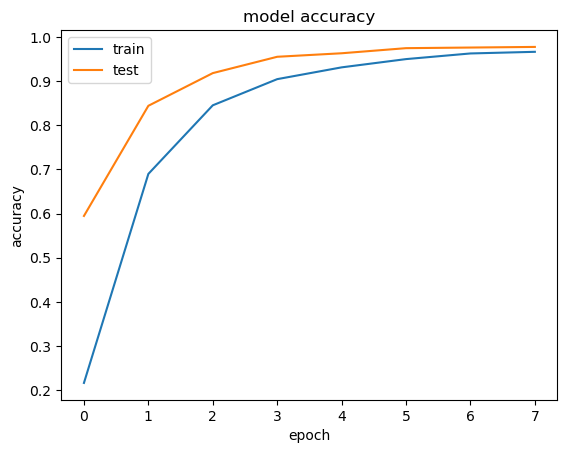

In [6]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 2- Loss of model

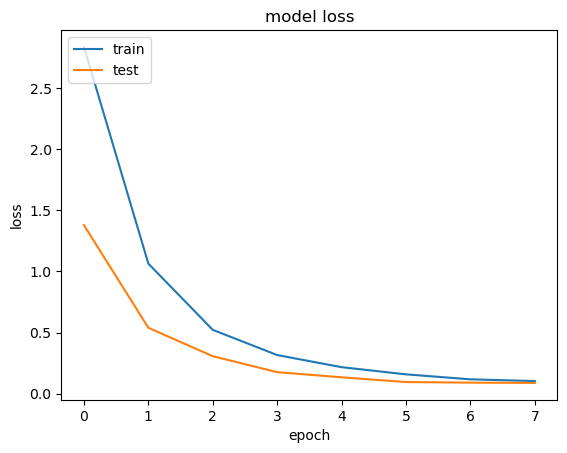

In [7]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()